<a href="https://www.kaggle.com/code/sondosaabed/flowers-image-classifier-with-deep-learning-tf?scriptVersionId=217907740" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Flowers Image Classifier Project 

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, to include an image classifier in a smart phone app. That would be using a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications.  In this project, an image classifier is trained to recognize different species of flowers. Using something like this in a phone app that tells the name of the flower the camera is looking at. Here, this classifier is trained, then exported for use in the application. The dataset used [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories it is one of the tensorflow datsets.


The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

## Import Resources

In [1]:
!pip install --upgrade tensorflow==2.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  At

In [2]:
## Making all necessary imports.
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import json
from PIL import Image
import os
from tensorflow.keras import layers

## tf used version 
print(tf.__version__)

2025-01-16 12:01:43.450480: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-16 12:01:43.450569: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-16 12:01:43.450625: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.14.0


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

## there is an issue with compatabilty for tensorflow 2.16 I had to downgrade and downgrading caused inactivation of GPUs :(

Num GPUs Available:  0


In [4]:
!pip freeze > requirements.txt

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


## Load the Dataset

Here the `tensorflow_datasets` are used to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  The training data is normalized and resized to 224x224 pixels as required by the pre-trained networks. The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but they still need to be normalize and resized the images to the appropriate size.

In [5]:
splits = ['test[:80%]', 'test[80%:]', 'train']

> I have used the test split here since it's much larger than the train, that would result in a better performance.

In [6]:
# Load the dataset with TensorFlow Datasets.
dataset, dateset_info = tfds.load('oxford_flowers102', split= splits, with_info= True, as_supervised=True)

# Create a training set, a validation set and a test set.
training_set, validation_set, test_set = dataset 

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.PF9DV7_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.PF9DV7_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.PF9DV7_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


## Explore the Dataset

In [7]:
print(f'There are {len(training_set)} images in the training set')
print(f'There are {len(validation_set)} images in the validation set')
print(f'There are {len(test_set)} images in the test set')

There are 4919 images in the training set
There are 1230 images in the validation set
There are 1020 images in the test set


In [8]:
dateset_info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [9]:
## Get the number of examples in each set from the dataset info.
classes = dateset_info.features['label'].num_classes
print("The number of classes in this dataset is: ", classes)

## Get the number of classes in the dataset from the dataset info.
examples = dateset_info.splits['train'].num_examples
print("The number of examples in the train set is: ", examples)

examples = dateset_info.splits['train'].num_examples
print("The number of examples in the validation set is: ", examples)

examples_test = dateset_info.splits['test'].num_examples
print("The number of examples in the test set is: ", examples_test)

The number of classes in this dataset is:  102
The number of examples in the train set is:  1020
The number of examples in the validation set is:  1020
The number of examples in the test set is:  6149


In [10]:
## Checking how the elemnt structure is in this dataset
for element in training_set.take(1):
    print(element)

(<tf.Tensor: shape=(542, 500, 3), dtype=uint8, numpy=
array([[[ 10,  17,   9],
        [ 10,  17,   9],
        [ 10,  17,   9],
        ...,
        [ 14,  15,   9],
        [ 14,  15,   9],
        [ 14,  15,   9]],

       [[ 10,  17,   9],
        [ 10,  17,   9],
        [ 10,  17,   9],
        ...,
        [ 15,  16,  10],
        [ 15,  16,  10],
        [ 15,  16,  10]],

       [[ 10,  17,   9],
        [ 10,  17,   9],
        [ 10,  17,   9],
        ...,
        [ 15,  16,  11],
        [ 15,  16,  11],
        [ 15,  16,  11]],

       ...,

       [[ 56,  69,  25],
        [ 55,  66,  23],
        [ 55,  64,  19],
        ...,
        [107, 144,  12],
        [133, 170,  39],
        [160, 197,  65]],

       [[ 62,  69,  28],
        [ 59,  66,  25],
        [ 56,  61,  21],
        ...,
        [110, 145,  15],
        [137, 172,  44],
        [164, 199,  69]],

       [[ 65,  69,  32],
        [ 62,  66,  29],
        [ 59,  59,  23],
        ...,
        [111, 146,  

In [11]:
## Print the shape and corresponding label of 3 images in the training set.
for element in training_set.take(3):
    image = element[0]
    label = element[1]
    
    print("The images in our dataset have: ")
    print("Datatype: ", image.dtype)
    print("Shape: ", image.shape)

    print("The labels in our dataset have: ")
    print("Datatype: ", label.dtype)

The images in our dataset have: 
Datatype:  <dtype: 'uint8'>
Shape:  (542, 500, 3)
The labels in our dataset have: 
Datatype:  <dtype: 'int64'>
The images in our dataset have: 
Datatype:  <dtype: 'uint8'>
Shape:  (748, 500, 3)
The labels in our dataset have: 
Datatype:  <dtype: 'int64'>
The images in our dataset have: 
Datatype:  <dtype: 'uint8'>
Shape:  (500, 600, 3)
The labels in our dataset have: 
Datatype:  <dtype: 'int64'>


> It is noticed that the images don't have the same sizes.

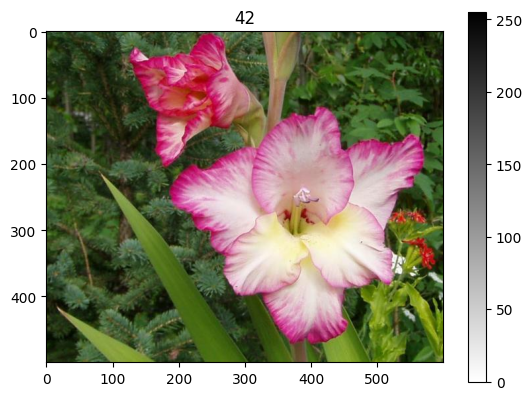

The label of this image is:  42


In [12]:
# Plot 1 image from the training set. Set the title 
for element in training_set.take(3):
    image = element[0].numpy().squeeze() ## remove dimension
    label = element[1].numpy()

plt.imshow(image, cmap = plt.cm.binary)
plt.title(label)
plt.colorbar()
plt.show()

# of the plot to the corresponding image label. 
print("The label of this image is: ", label)

### Label Mapping



You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [13]:
## since I'm working on kaggle teh file name is diffrent than the udacity workplace
with open('/kaggle/input/pytorch-challange-flower-dataset/cat_to_name.json', 'r') as f:
    class_names = json.load(f)

print(class_names)

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

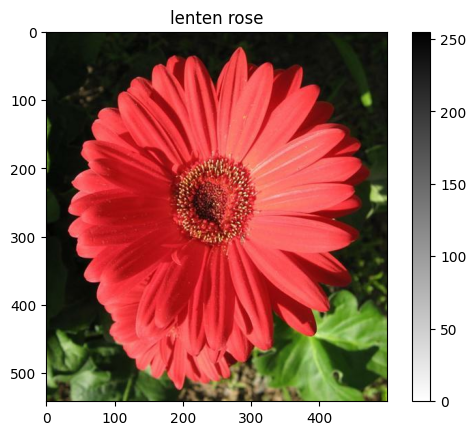

The label of this image is:  lenten rose


In [14]:
# Plot 1 image from the training set. Set the title 
for element in training_set.take(1):
    image = element[0].numpy().squeeze() ## remove dimension
    label = element[1].numpy()

plt.imshow(image, cmap = plt.cm.binary)
plt.title(class_names[str(label)])
plt.colorbar()
plt.show()

# of the plot to the corresponding class name. 
print("The label of this image is: ", class_names[str(label)])

## Create Pipeline

In [15]:
BATCH_SIZE = 64
IMAGE_SHAPE = (224, 224)

In [16]:
def preprocessing(image, label):
    """
    Args:
        - image 
        - label
    Returns:
        Normalized image and label
    """
    image = tf.image.resize(image, IMAGE_SHAPE)
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

In [17]:
# Create a pipeline for each set.
training_batches = training_set.map(preprocessing).cache().shuffle(examples//4).batch(BATCH_SIZE).prefetch(1)

validation_batches = validation_set.map(preprocessing).cache().batch(BATCH_SIZE).prefetch(1)
test_batches = test_set.map(preprocessing).cache().batch(BATCH_SIZE).prefetch(1)

In [18]:
for image_batch, label_batch in training_batches.take(1):
    print("Images in each batch have: ")
    print("datatype: ", image_batch.dtype)
    print("shape: ", image_batch.shape )

    print('There are a total of {} image labels in this batch: '.format(label_batch.numpy().size))
    print(label_batch.numpy())

Images in each batch have: 
datatype:  <dtype: 'float32'>
shape:  (64, 224, 224, 3)
There are a total of 64 image labels in this batch: 
[84 69 64 97 80 61 80 21 65 70 26 92 72 24 66 94 75 35 81 40 39 50 85 53
 24 72 94 28 49 76 76 27 77 64 50 29 79 30 77 59 89 64 49 52 35 44 99 67
 91 42 93 23  8 85 25 53 16 40 88 71 77 76 47 89]


> Let's plot the normalized image and see how it looks like

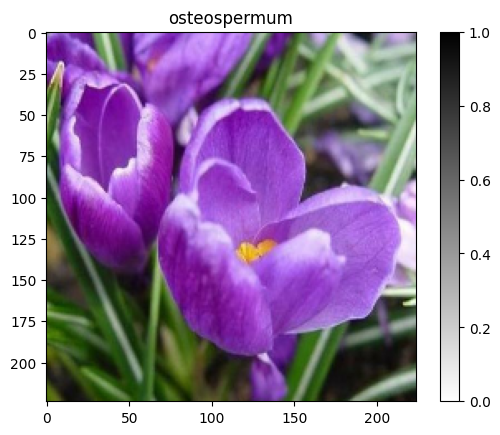

In [19]:
for image_batch, label_batch in training_batches.take(1):
    images = image_batch.numpy().squeeze()
    labels = label_batch.numpy()

## plotting the image 
plt.imshow(images[0], cmap = plt.cm.binary)
plt.colorbar()
plt.title(class_names[str(labels[0])])
plt.show()

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. Using the MobileNet pre-trained model from TensorFlow Hub to get the image features. Then a new feed-forward classifier using those features is build and trained.

Things done in this section:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Defined a new, untrained feed-forward network as a classifier.
* Trained the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save trained model as a Keras model. 

### Model Archeticture

In [20]:
EPOCHS = 100

In [21]:
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(url, input_shape=(224, 224, 3))
feature_extractor.trainable = False

In [22]:
model = tf.keras.Sequential([feature_extractor,
                            tf.keras.layers.Dense(classes, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2388646 (9.11 MB)
Trainable params: 130662 (510.40 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


### Model Training

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.


In [23]:
model.compile(optimizer = 'Adam',
             loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

#### Training Callbacks

In [24]:
# Save the Model with the lowest validation loss and use early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)
save_best = tf.keras.callbacks.ModelCheckpoint('./best_model.h5',
                                               monitor='val_loss',
                                               save_best_only=True)

In [25]:
### Train the model
history = model.fit(training_batches,
                   epochs = EPOCHS, 
                   validation_data = validation_batches,
                   callbacks = [early_stopping, save_best])

Epoch 1/100
77/77 [==============================] - 117s 1s/step - loss: 2.6862 - accuracy: 0.4395 - val_loss: 1.4548 - val_accuracy: 0.7000
Epoch 2/100


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/77 [==============================] - 108s 1s/step - loss: 0.9135 - accuracy: 0.8422 - val_loss: 0.8809 - val_accuracy: 0.8122
Epoch 3/100
77/77 [==============================] - 107s 1s/step - loss: 0.5303 - accuracy: 0.9213 - val_loss: 0.6805 - val_accuracy: 0.8618
Epoch 4/100
77/77 [==============================] - 126s 2s/step - loss: 0.3646 - accuracy: 0.9476 - val_loss: 0.5796 - val_accuracy: 0.8797
Epoch 5/100
77/77 [==============================] - 106s 1s/step - loss: 0.2686 - accuracy: 0.9663 - val_loss: 0.5224 - val_accuracy: 0.8886
Epoch 6/100
77/77 [==============================] - 127s 2s/step - loss: 0.2077 - accuracy: 0.9774 - val_loss: 0.4840 - val_accuracy: 0.8967
Epoch 7/100
77/77 [==============================] - 105s 1s/step - loss: 0.1663 - accuracy: 0.9841 - val_loss: 0.4594 - val_accuracy: 0.8951
Epoch 8/100
77/77 [==============================] - 107s 1s/step - loss: 0.1350 - accuracy: 0.9896 - val_loss: 0.4309 - val_accuracy: 0.9016
Epoch 9/100
77/77 

### Model Evaluation

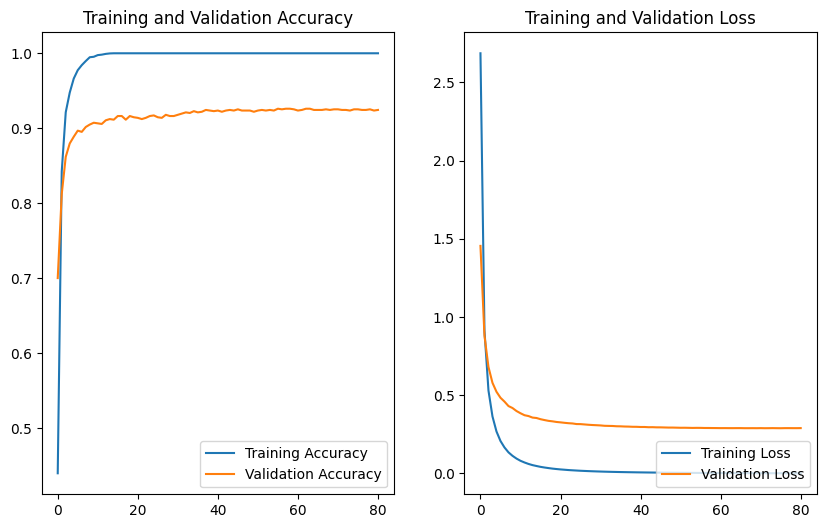

In [26]:
# Plot the loss and accuracy values achieved during training for the training and validation set.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range = range(len(history.history['val_loss']))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.plot(epochs_range, training_accuracy, label='Training Accuracy')
ax1.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
ax1.legend(loc='lower right')
ax1.set_title('Training and Validation Accuracy')

ax2.plot(epochs_range, training_loss, label='Training Loss')
ax2.plot(epochs_range, validation_loss, label='Validation Loss')
ax2.legend(loc='lower right')
ax2.set_title('Training and Validation Loss')

# Show the plot
plt.show()

## Testing your Network



It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [27]:
# Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = model.evaluate(test_batches)

print("Loss on testing set: ", loss)
print("Accuracy on testing set: ", accuracy)

16/16 [==============================] - 19s 1s/step - loss: 0.4315 - accuracy: 0.8824
Loss on testing set:  0.4315071702003479
Accuracy on testing set:  0.8823529481887817


## Save the Model



Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [28]:
# Save your trained model as a Keras model.
model.save('test_model.keras') ## I'll be using the best_model though wrote this line as required

## Load the Keras Model



Load the Keras model you saved above.

In [29]:
## Load the Keras model

reloaded_model = tf.keras.models.load_model('best_model.h5', custom_objects = {'KerasLayer':hub.KerasLayer})
reloaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 102)               130662    
                                                                 
Total params: 2388646 (9.11 MB)
Trainable params: 130662 (510.40 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [30]:
# Print the loss and accuracy values achieved on the entire test set for best model
loss, accuracy = reloaded_model.evaluate(test_batches)

print("Loss on testing set: ", loss)
print("Accuracy on testing set: ", accuracy)

16/16 [==============================] - 18s 1s/step - loss: 0.4296 - accuracy: 0.8833
Loss on testing set:  0.42961564660072327
Accuracy on testing set:  0.8833333253860474


# Inference for Classification

### Image Pre-processing

In [31]:
# Create the process_image function
def process_image(image_path):
    """
    Args:
        - image_path
    Returns:
        - Preprocessed image
    """
    image = Image.open(image_path)
    image = np.asarray(image)
    image = tf.image.resize(image, IMAGE_SHAPE)
    image = tf.cast(image, tf.float32)
    image /= 255
    return image

To check your `process_image` function 4 images are provided in the `/kaggle/input/test-images` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

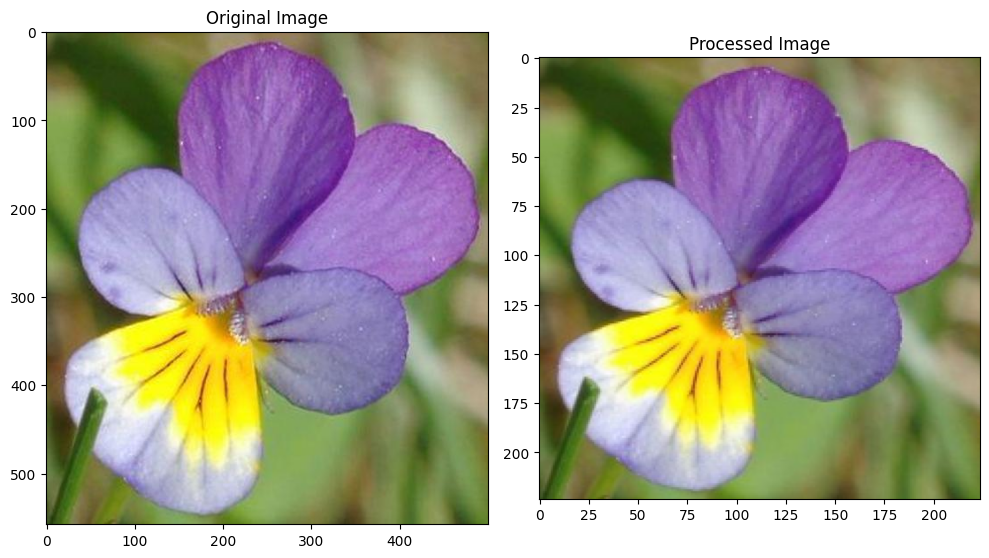

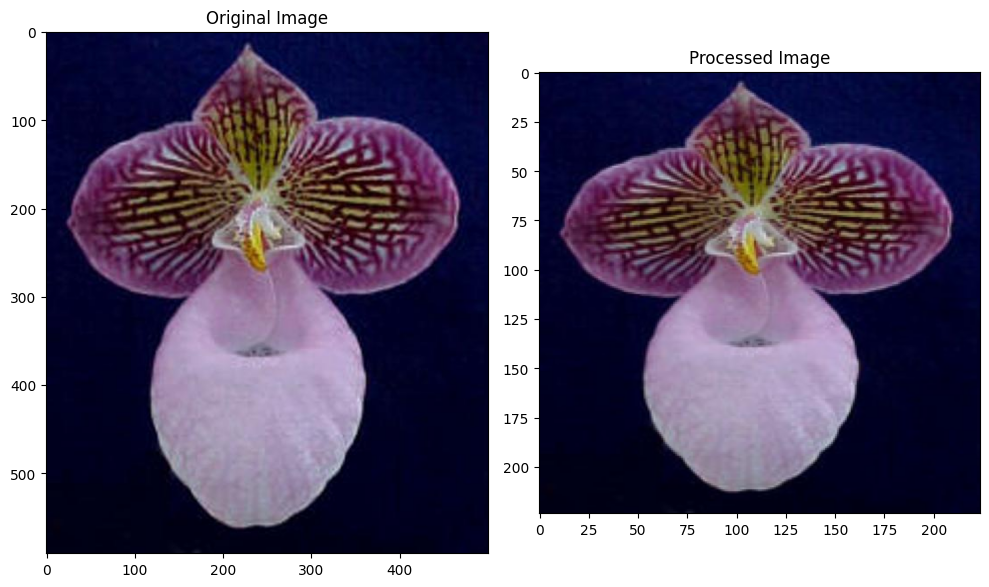

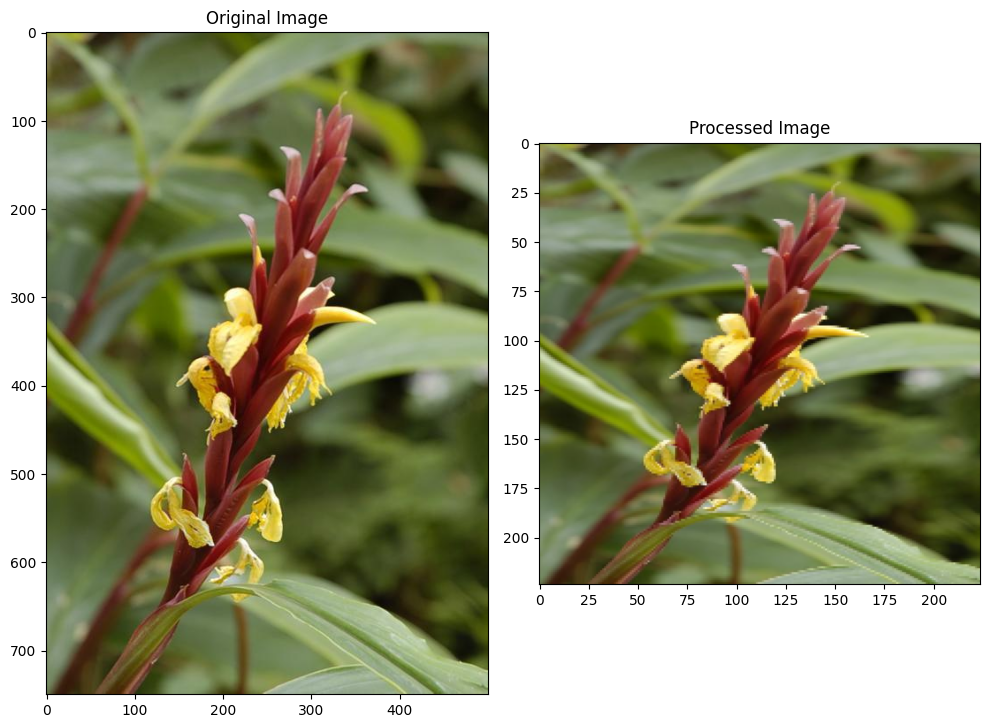

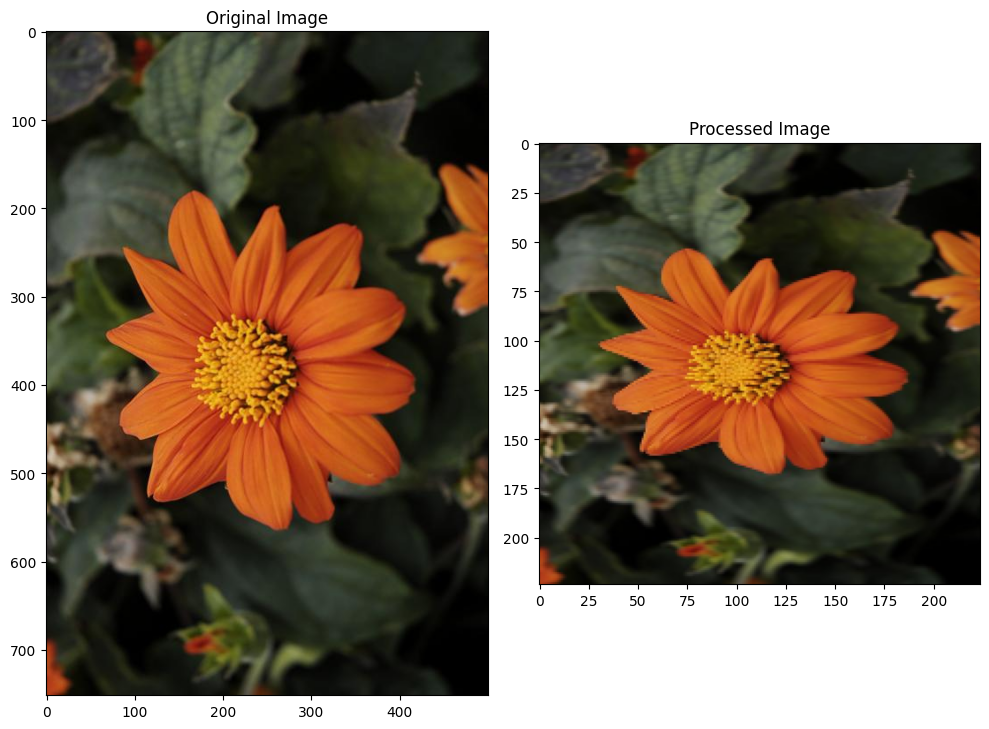

In [32]:
test_images = "/kaggle/input/test-images" ## I added a kaggle dataset as a test images included in the project workplace

for test_image_path in os.listdir(test_images):
    fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
    
    test_image = Image.open(os.path.join(test_images, test_image_path))
    test_image = np.asarray(test_image)
    ax1.imshow(test_image)
    ax1.set_title('Original Image')

    processed_test_image = process_image(os.path.join(test_images, test_image_path))
    ax2.imshow(processed_test_image)
    ax2.set_title('Processed Image')
    plt.tight_layout()
    plt.show()

### Inference

Now that the images are in the correct format, it's time to write the `predict` function for making inference with our model.

In [33]:
# Create the predict function
def predict(image_path, model, top_k):
    """
    Args:
        - image_path
        - model
        - top_k

    Returns:
        returns the top $K$ most likely class labels along with the probabilities.
    """
    processed_image = process_image(image_path)
    expanded_image = np.expand_dims(processed_image, axis=0)
    
    model_prediction = model.predict(expanded_image)
     
    top_k_probs, top_k_classes = tf.nn.top_k(model_prediction, k=top_k)
    top_k_probs = list(top_k_probs.numpy()[0])
    top_k_classes = list(top_k_classes.numpy()[0])
     
    return top_k_probs, top_k_classes, processed_image 

# Sanity Check

It's always good to check the predictions made by the model to make sure they are correct. 4 images in the `./test_images/` folder are checked:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In [34]:
def plot_prop(test_image_path, processed_image, top_k_class_names, top_k_probs):
    """
    Plots class probabilty with class names.
    Args:
        - ps
        - first_image
    Returns:
        
    """
    fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
    
    ax1.imshow(processed_image)
    ax1.axis('off')
    ax1.set_title((os.path.basename(test_image_path)).replace('_', ' ').replace(".jpg", ""))
    ax2.barh(np.arange(5), top_k_probs)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(5))
    ax2.set_yticklabels(top_k_class_names, size='small')
    ax2.set_title('Class Probability:')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this: You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 52ms/step


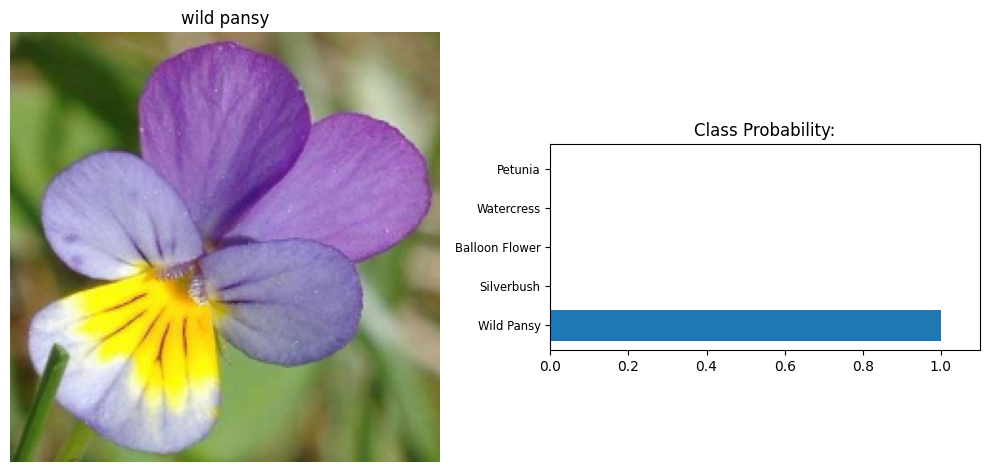

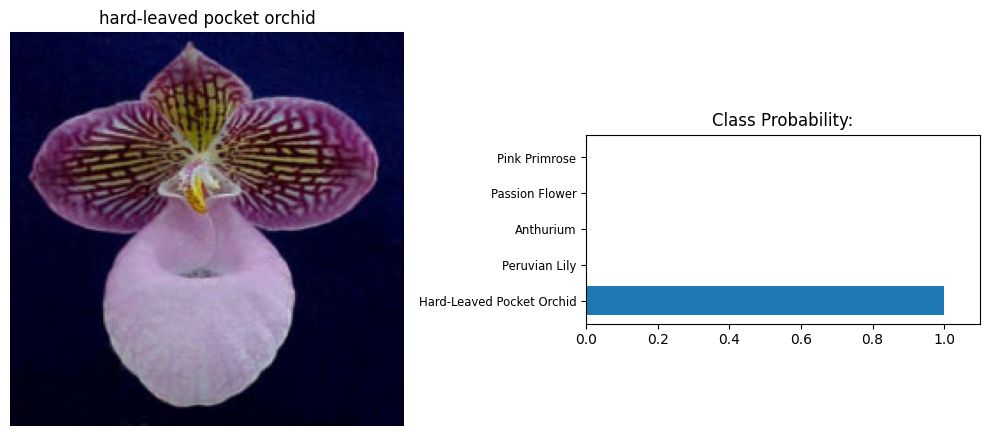

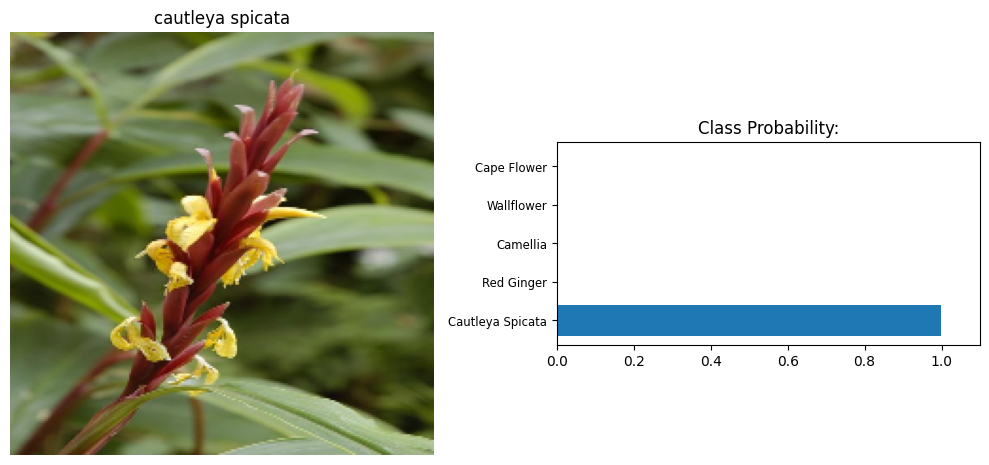

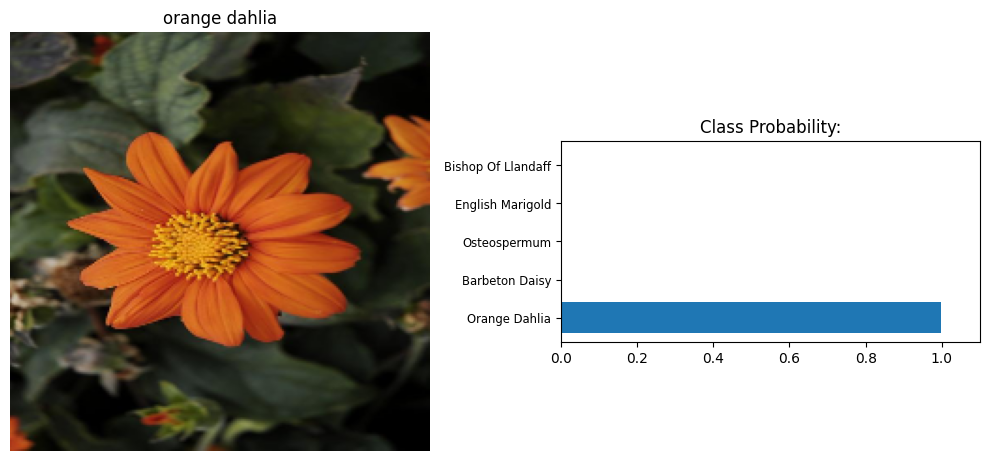

In [35]:
for test_image_path in os.listdir(test_images):    
    test_image = Image.open(os.path.join(test_images, test_image_path))

    top_k_probs, top_k_classes, processed_image = predict(os.path.join(test_images, test_image_path), reloaded_model, 5)
    
    top_k_class_names = []
    for lable in top_k_classes:
        top_k_class_names.append(class_names[str(lable+1)].title())

    plot_prop(test_image_path, processed_image, top_k_class_names, top_k_probs)